<a href="https://colab.research.google.com/github/vincimech010233/QuantumComputingJourney-/blob/main/fractal_cuantico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cirq


Circuito Cuántico:
0: ───H───

1: ───H───

2: ───H───

3: ───H───

4: ───H───


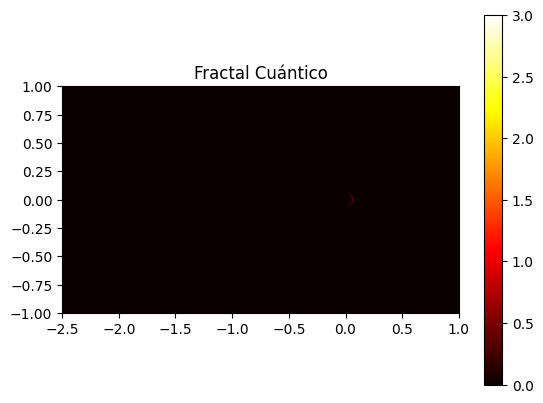

In [5]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

# Función para crear un circuito cuántico simple
def create_quantum_circuit(qubits):
    circuit = cirq.Circuit()
    circuit.append([cirq.H(q) for q in qubits])  # Aplicar la puerta de Hadamard
    return circuit

# Función para simular un circuito y obtener las probabilidades de medición de cada qubit
def simulate_circuit(circuit):
    simulator = cirq.Simulator()
    result = simulator.simulate(circuit)
    return np.abs(result.final_state_vector)**2

# Función para generar y visualizar un fractal influenciado por las probabilidades cuánticas
def generate_quantum_fractal(probabilities, width, height, max_iter=1000):
    image = np.zeros((height, width))
    x_min, x_max = -2.5, 1
    y_min, y_max = -1, 1
    x_range = np.linspace(x_min, x_max, width)
    y_range = np.linspace(y_min, y_max, height)

    for i in range(width):
        for j in range(height):
            c = complex(x_range[i], y_range[j])
            z = 0
            for k in range(max_iter):
                z = z * z + c
                # Aquí utilizamos las probabilidades para alterar el criterio de escape
                if abs(z) > 2 * probabilities[k % len(probabilities)]:
                    image[j, i] = k
                    break

    plt.imshow(image, cmap='hot', extent=(x_min, x_max, y_min, y_max))
    plt.colorbar()
    plt.title('Fractal Cuántico')
    plt.show()

# Configuración inicial
num_qubits = 5
qubits = [cirq.LineQubit(i) for i in range(num_qubits)]
circuit = create_quantum_circuit(qubits)

# Visualización del circuito
print("Circuito Cuántico:")
print(circuit)

# Simular el circuito y obtener las probabilidades
probabilities = simulate_circuit(circuit)

# Generar y visualizar un fractal cuántico
generate_quantum_fractal(probabilities, 800, 600)
